In [1]:
!pip install yfinance

# Question 1 - Extracting Tesla Stock Data Using yfinance

In [62]:
import yfinance as yf
import pandas as pd

In [63]:
tesla = yf.Ticker('TSLA')
tesla_data = yf.download('TSLA', start="2023-01-01", end="2023-12-31", interval="1mo")

[*********************100%%**********************]  1 of 1 completed


In [64]:
tesla_df = pd.DataFrame(tesla_data)
tesla_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,118.470001,180.679993,101.809998,173.220001,173.220001,3897499400
2023-02-01,173.889999,217.649994,169.929993,205.710007,205.710007,3624845100
2023-03-01,206.210007,207.789993,163.910004,207.460007,207.460007,3311619900
2023-04-01,199.910004,202.690002,152.369995,164.309998,164.309998,2505176300
2023-05-01,163.169998,204.479996,158.830002,203.929993,203.929993,2681994800
2023-06-01,202.589996,276.989990,199.369995,261.769989,261.769989,3440477900
2023-07-01,276.489990,299.290009,254.119995,267.429993,267.429993,2392089000
2023-08-01,266.260010,266.470001,212.360001,258.079987,258.079987,2501580900
2023-09-01,257.260010,278.980011,234.580002,250.220001,250.220001,2439306100


# Question 2 - Extracting Tesla Revenue Data Using Webscraping 

In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing Tesla's revenue data
url = "https://companiesmarketcap.com/eur/tesla/revenue/"

# Send a GET request to the webpage
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the revenue data table
table = soup.find('table', class_='table')


In [46]:
# Initialize lists to store the header and rows data
headers = []
rows = []

# Extract headers
header_row = table.find('thead').find_all('tr')[0]
headers = [th.text.strip() for th in header_row.find_all('th')]

# Extract rows
for row in table.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    if len(cols) > 0:  # Make sure there are columns
        row_data = [col.text.strip() for col in cols]
        rows.append(row_data)

# Create a DataFrame from the extracted data
tes_rev_df = pd.DataFrame(rows, columns=headers)
tes_rev_df = tes_rev_df.sort_values(by='Year', ascending=True)

tes_rev_df['Revenue'] = tes_rev_df['Revenue'].str.replace('€', '')
tes_rev_df['Revenue'] = tes_rev_df['Revenue'].str.replace('B', '')
# Only modify the rows that end with 'M'
tes_rev_df['Revenue'] = tes_rev_df['Revenue'].apply(lambda x: float(x.replace('M', '')) / 1000 if 'M' in x else float(x))

# Display the DataFrame
print(tes_rev_df.head(10))



    Year   Revenue   Change
15  2009   0.07813         
14  2010   0.08776   12.33%
13  2011   0.15000   79.19%
12  2012   0.31000   98.65%
11  2013   1.45000  366.68%
10  2014   2.62000   80.37%
9   2015   3.70000   40.71%
8   2016   6.65000   79.85%
7   2017   9.80000   47.26%
6   2018  18.75000   91.42%


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [47]:
import yfinance as yf
import pandas as pd

In [48]:
gamestop = yf.Ticker('GME')
gamestop_data = yf.download('GME', start="2023-01-01", end="2023-12-31", interval="1mo")

[*********************100%%**********************]  1 of 1 completed


In [49]:
gamestop_df = pd.DataFrame(gamestop_data)
gamestop_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,18.639999,23.480000,15.410000,21.870001,21.870001,103365700
2023-02-01,21.490000,24.879999,18.889999,19.230000,19.230000,81856100
2023-03-01,18.920000,27.000000,15.530000,23.020000,23.020000,171919100
2023-04-01,22.940001,23.850000,18.650000,19.290001,19.290001,49897500
2023-05-01,19.160000,24.799999,18.059999,24.049999,24.049999,64057900
2023-06-01,24.040001,27.650000,20.100000,24.250000,24.250000,128159300
2023-07-01,24.290001,25.110001,21.790001,22.200001,22.200001,47235300
2023-08-01,21.950001,22.000000,16.180000,18.549999,18.549999,59251700
2023-09-01,18.660000,19.480000,16.400000,16.459999,16.459999,73532000


# Question 4 - Extracting GameStop Revenue Data Using Webscraping 

In [58]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GameStop's revenue data
url = "https://companiesmarketcap.com/eur/gamestop/revenue/"

# Send a GET request to the webpage
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the revenue data table
table = soup.find('table', class_='table')


In [59]:
# Initialize lists to store the header and rows data
headers = []
rows = []

# Extract headers
header_row = table.find('thead').find_all('tr')[0]
headers = [th.text.strip() for th in header_row.find_all('th')]

# Extract rows
for row in table.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    if len(cols) > 0:  # Make sure there are columns
        row_data = [col.text.strip() for col in cols]
        rows.append(row_data)

# Create a DataFrame from the extracted data
game_rev_df = pd.DataFrame(rows, columns=headers)
game_rev_df = game_rev_df.sort_values(by='Year', ascending=True)

game_rev_df['Revenue'] = game_rev_df['Revenue'].str.replace('€', '')
game_rev_df['Revenue'] = game_rev_df['Revenue'].str.replace('B', '')

# Display the DataFrame
print(game_rev_df.head(10))



    Year Revenue  Change
23  2001   1.26         
22  2002   1.29    1.94%
21  2003   1.25    -3.1%
20  2004   1.35    8.33%
19  2005   2.60   92.12%
18  2006   4.03   54.45%
17  2007   4.85   20.53%
16  2008   6.29   29.65%
15  2009   6.33    0.59%
14  2010   7.12   12.41%


# Question 5 - Tesla Stock and Revenue Dashboard

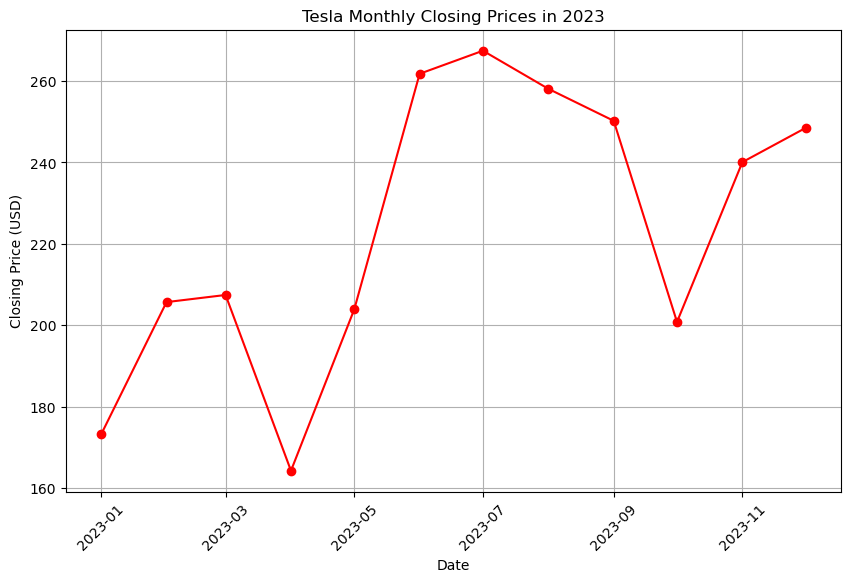

In [65]:
import matplotlib.pyplot as plt

# Plotting the 'Close' prices over the selected date range
plt.figure(figsize=(10, 6))
plt.plot(tesla_df.index, tesla_df['Close'], marker='o', linestyle='-', color='r')

plt.title("Tesla Monthly Closing Prices in 2023")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


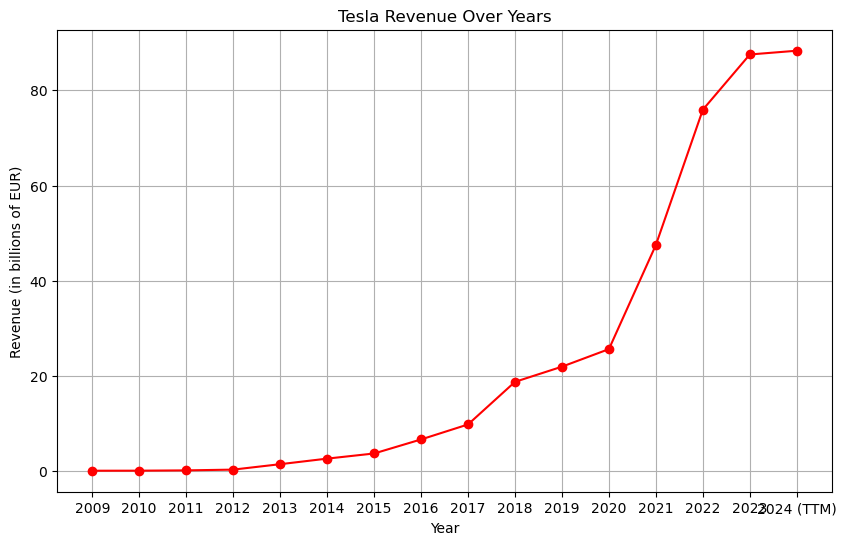

In [68]:
import matplotlib.pyplot as plt

# Plotting the revenue over the years
plt.figure(figsize=(10, 6))
plt.plot(tes_rev_df['Year'], tes_rev_df['Revenue'].astype(float), marker='o', linestyle='-', color='r')

plt.title("Tesla Revenue Over Years")
plt.xlabel("Year")
plt.ylabel("Revenue (in billions of EUR)")
plt.grid(True)
plt.show()


# Question 6 - GameStop Stock and Revenue Dashboard

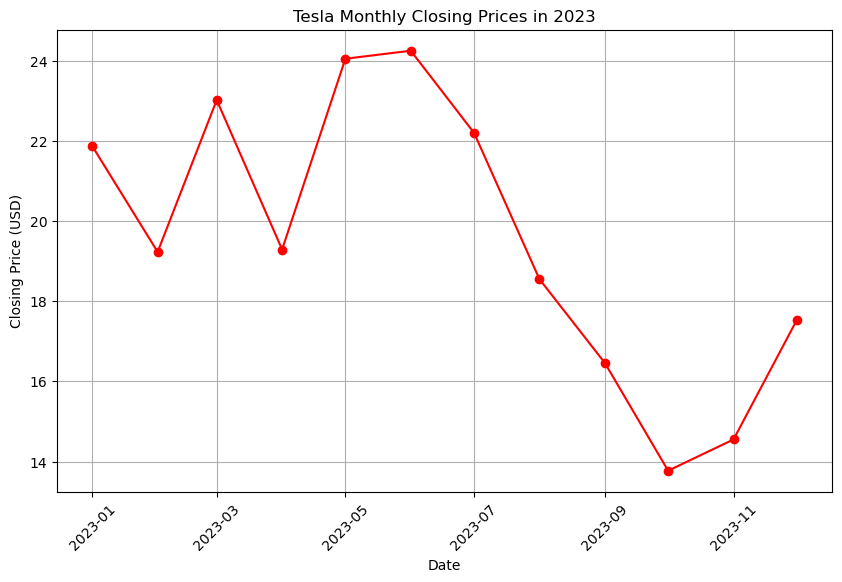

In [69]:
import matplotlib.pyplot as plt

# Plotting the 'Close' prices over the selected date range
plt.figure(figsize=(10, 6))
plt.plot(gamestop_df.index, gamestop_df['Close'], marker='o', linestyle='-', color='r')

plt.title("GameStop Monthly Closing Prices in 2023")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


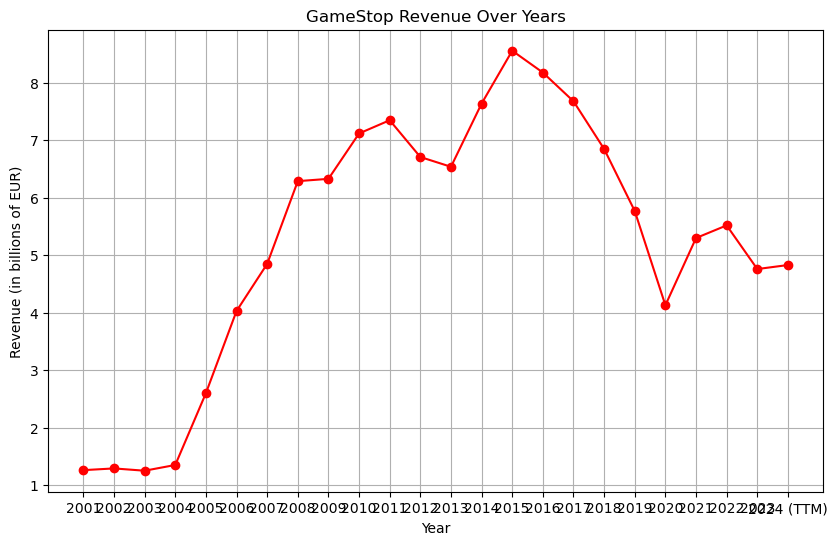

In [71]:
import matplotlib.pyplot as plt

# Plotting the revenue over the years
plt.figure(figsize=(10, 6))
plt.plot(game_rev_df['Year'], game_rev_df['Revenue'].astype(float), marker='o', linestyle='-', color='r')

plt.title("GameStop Revenue Over Years")
plt.xlabel("Year")
plt.ylabel("Revenue (in billions of EUR)")
plt.grid(True)
plt.show()
